In [1]:
# import statements
%load_ext autoreload
%autoreload 2
%cd "../"

import torch 
from torch.autograd import Variable 
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    

import numpy as np
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import pickle
from scipy.cluster.vq import kmeans2
import scipy.stats as ss
from scipy.io import loadmat

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


In [31]:

def closure():
    return 0.5*(0.1*x*x + (y+0.5*x*x)**2)

def prob(x, y):
    return np.exp(-0.5*(0.1*x*x + (y+ 0.5*x*x)**2))

def plot_contours():
    X = np.linspace(-10, 10, 300)
    Y = np.linspace(-12, 4, 1000)

    X, Y = np.meshgrid(X, Y)

    Z = prob(X, Y)
    plt.contour(X, Y, Z)

In [42]:
from samplers import MALA

x = torch.nn.Parameter(torch.Tensor([1]))
y = torch.nn.Parameter(torch.Tensor([1]))

params = [x, y]
sampler = MALA(params, lr=1e-1, add_noise=True)


x.data = torch.randn([1])
y.data = torch.randn([1])
chain, logp_array = sampler.sample(closure, burn_in=1000, num_samples=100)


<class 'dict'>
Burn-in phase started
Burn-in iter 1
Burn-in iter 2
Burn-in iter 3
Burn-in iter 4
Burn-in iter 5
Burn-in iter 6
Burn-in iter 7
Burn-in iter 8
Burn-in iter 9
Burn-in iter 10
Burn-in iter 11
Burn-in iter 12
Burn-in iter 13
Burn-in iter 14
Burn-in iter 15
Burn-in iter 16
Burn-in iter 17
Burn-in iter 18
Burn-in iter 19
Burn-in iter 20
Burn-in iter 21
Burn-in iter 22
Burn-in iter 23
Burn-in iter 24
Burn-in iter 25
Burn-in iter 26
Burn-in iter 27
Burn-in iter 28
Burn-in iter 29
Burn-in iter 30
Burn-in iter 31
Burn-in iter 32
Burn-in iter 33
Burn-in iter 34
Burn-in iter 35
Burn-in iter 36
Burn-in iter 37
Burn-in iter 38
Burn-in iter 39
Burn-in iter 40
Burn-in iter 41
Burn-in iter 42
Burn-in iter 43
Burn-in iter 44
Burn-in iter 45
Burn-in iter 46
Burn-in iter 47
Burn-in iter 48
Burn-in iter 49
Burn-in iter 50
Burn-in iter 51
Burn-in iter 52
Burn-in iter 53
Burn-in iter 54
Burn-in iter 55
Burn-in iter 56
Burn-in iter 57
Burn-in iter 58
Burn-in iter 59
Burn-in iter 60
Burn-in iter

Burn-in iter 527
Burn-in iter 528
Burn-in iter 529
Burn-in iter 530
Burn-in iter 531
Burn-in iter 532
Burn-in iter 533
Burn-in iter 534
Burn-in iter 535
Burn-in iter 536
Burn-in iter 537
Burn-in iter 538
Burn-in iter 539
Burn-in iter 540
Burn-in iter 541
Burn-in iter 542
Burn-in iter 543
Burn-in iter 544
Burn-in iter 545
Burn-in iter 546
Burn-in iter 547
Burn-in iter 548
Burn-in iter 549
Burn-in iter 550
Burn-in iter 551
Burn-in iter 552
Burn-in iter 553
Burn-in iter 554
Burn-in iter 555
Burn-in iter 556
Burn-in iter 557
Burn-in iter 558
Burn-in iter 559
Burn-in iter 560
Burn-in iter 561
Burn-in iter 562
Burn-in iter 563
Burn-in iter 564
Burn-in iter 565
Burn-in iter 566
Burn-in iter 567
Burn-in iter 568
Burn-in iter 569
Burn-in iter 570
Burn-in iter 571
Burn-in iter 572
Burn-in iter 573
Burn-in iter 574
Burn-in iter 575
Burn-in iter 576
Burn-in iter 577
Burn-in iter 578
Burn-in iter 579
Burn-in iter 580
Burn-in iter 581
Burn-in iter 582
Burn-in iter 583
Burn-in iter 584
Burn-in iter 5

Sample iter: 60
Sample iter: 61
Sample iter: 62
Sample iter: 63
Sample iter: 64
Sample iter: 65
Sample iter: 66
Sample iter: 67
Sample iter: 68
Sample iter: 69
Sample iter: 70
Sample iter: 71
Sample iter: 72
Sample iter: 73
Sample iter: 74
Sample iter: 75
Sample iter: 76
Sample iter: 77
Sample iter: 78
Sample iter: 79
Sample iter: 80
Sample iter: 81
Sample iter: 82
Sample iter: 83
Sample iter: 84
Sample iter: 85
Sample iter: 86
Sample iter: 87
Sample iter: 88
Sample iter: 89
Sample iter: 90
Sample iter: 91
Sample iter: 92
Sample iter: 93
Sample iter: 94
Sample iter: 95
Sample iter: 96
Sample iter: 97
Sample iter: 98
Sample iter: 99
Sample iter: 100


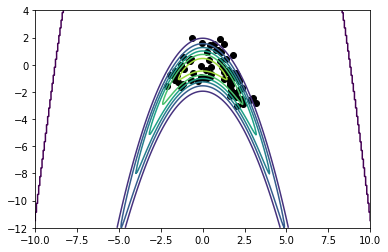

In [43]:

plot_contours()
for sample, acc in chain:
    if acc:
        x, y = sample[0][0][0], sample[0][1][0]
#         print(x, y)
        plt.scatter(x, y, color='k')
